# Classification problem

**Importing needed libraries**

In [1]:
!pip install scikit-plot

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import scikitplot as skplt


from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from imblearn.over_sampling import SMOTE

import joblib

import warnings
warnings.filterwarnings("ignore")

**Define configuration options**

In [3]:
pd.set_option('display.max_columns',None)

**Importing the dataset**

In [4]:
df=pd.read_excel('CTG.xls', sheet_name='Raw Data')

Making a copy of the dataframe

In [5]:
df_copy=df.copy()

Seeing the composition of the dataframe, where We can notice already some NANs

In [6]:
df

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,73.0,0.5,43.0,2.4,0.0,0.0,0.0,0.0,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,17.0,2.1,0.0,10.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,16.0,2.1,0.0,13.4,2.0,0.0,0.0,0.0,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,16.0,2.4,0.0,23.0,2.0,0.0,0.0,0.0,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,78.0,0.4,27.0,7.0,0.0,0.0,0.0,0.0,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2126,S8001045.dsp,1998-06-06,CTG2128.txt,2796.0,3415.0,142.0,142.0,1.0,1.0,5.0,74.0,0.4,36.0,5.0,0.0,0.0,0.0,0.0,42.0,117.0,159.0,2.0,1.0,145.0,143.0,145.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2127,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset's variables description:

* FileName - filename of CTG examination	
* Date - date of the examination	
* b - start instant	
* e	- end instant	
* LBE - baseline value (medical expert)	
* LB - FHR baseline (beats per minute)
* AC - # of accelerations per second
* FM - # of fetal movements per second
* UC - # of uterine contractions per second
* DL - # of light decelerations per second
* DS - # of severe decelerations per second
* DP - # of prolongued decelerations per second
* DR - # of repetitive decelerations
* ASTV - percentage of time with abnormal short term variability
* MSTV - mean value of short term variability
* ALTV - percentage of time with abnormal long term variability
* MLTV - mean value of long term variability
* Width - width of FHR histogram
* Min - minimum of FHR histogram
* Max - Maximum of FHR histogram
* Nmax - # of histogram peaks
* Nzeros - # of histogram zeros
* Mode - histogram mode
* Mean - histogram mean
* Median - histogram median
* Variance - histogram variance
* Tendency - histogram tendency
* A	- calm sleep	
* B	- REM sleep	
* C	- calm vigilance	
* D	- active vigilance	
* SH - shift pattern (A or Susp with shifts)	
* AD - accelerative/decelerative pattern (stress situation)	
* DE - decelerative pattern (vagal stimulation)	
* LD - largely decelerative pattern	
* FS - flat-sinusoidal pattern (pathological state)	
* SUSP - suspect pattern	
* CLASS - FHR pattern class code (1 to 10)

* **NSP - fetal state class code (N=normal; S=suspect; P=pathologic)**

# Explorative Data Analysis

In [7]:
df.shape

(2130, 40)

In [8]:
df.columns

Index(['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC',
       'ASTV', 'MSTV', 'ALTV', 'MLTV', 'DL', 'DS', 'DP', 'DR', 'Width', 'Min',
       'Max', 'Nmax', 'Nzeros', 'Mode', 'Mean', 'Median', 'Variance',
       'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP',
       'CLASS', 'NSP'],
      dtype='object')

In [9]:
df.isnull().sum()

FileName    4
Date        4
SegFile     4
b           4
e           4
LBE         4
LB          4
AC          4
FM          3
UC          3
ASTV        3
MSTV        3
ALTV        3
MLTV        3
DL          2
DS          2
DP          2
DR          2
Width       4
Min         4
Max         4
Nmax        4
Nzeros      4
Mode        4
Mean        4
Median      4
Variance    4
Tendency    4
A           4
B           4
C           4
D           4
E           4
AD          4
DE          4
LD          4
FS          4
SUSP        4
CLASS       4
NSP         4
dtype: int64

In [10]:
df=df.dropna()

In [11]:
df.shape

(2126, 40)

In [12]:
df.isnull().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

In [13]:
df.dtypes

FileName            object
Date        datetime64[ns]
SegFile             object
b                  float64
e                  float64
LBE                float64
LB                 float64
AC                 float64
FM                 float64
UC                 float64
ASTV               float64
MSTV               float64
ALTV               float64
MLTV               float64
DL                 float64
DS                 float64
DP                 float64
DR                 float64
Width              float64
Min                float64
Max                float64
Nmax               float64
Nzeros             float64
Mode               float64
Mean               float64
Median             float64
Variance           float64
Tendency           float64
A                  float64
B                  float64
C                  float64
D                  float64
E                  float64
AD                 float64
DE                 float64
LD                 float64
FS                 float64
S

In [14]:
df.sample(10)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,DP,DR,Width,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,A,B,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
752,Mmbms_1.txt,1995-02-22,CTG0752.txt,37.0,1183.0,134.0,134.0,0.0,4.0,0.0,79.0,0.2,41.0,5.5,0.0,0.0,0.0,0.0,17.0,128.0,145.0,2.0,0.0,135.0,135.0,136.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,3.0
480,Amrc6.txt,1996-05-01,CTG0480.txt,240.0,833.0,145.0,145.0,0.0,0.0,0.0,57.0,0.5,0.0,7.3,1.0,0.0,0.0,0.0,46.0,111.0,157.0,1.0,1.0,150.0,146.0,149.0,6.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1218,S0001051.dat,1996-09-23,CTG1218.txt,1794.0,2820.0,135.0,135.0,0.0,0.0,7.0,59.0,0.5,32.0,6.1,0.0,0.0,0.0,0.0,16.0,132.0,148.0,1.0,0.0,140.0,140.0,142.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1887,S8001031.dsp,1998-03-23,CTG1889.txt,963.0,1967.0,141.0,141.0,5.0,0.0,6.0,58.0,0.5,0.0,7.8,0.0,0.0,0.0,0.0,37.0,131.0,168.0,0.0,0.0,153.0,153.0,154.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1491,S0001094.dat,1996-10-14,CTG1493.txt,1720.0,2874.0,132.0,132.0,2.0,0.0,10.0,34.0,1.2,0.0,12.4,1.0,0.0,1.0,0.0,106.0,61.0,167.0,3.0,1.0,99.0,124.0,131.0,116.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,2.0
1196,S0001049.dat,1996-09-23,CTG1196.txt,2477.0,3413.0,138.0,138.0,11.0,0.0,5.0,37.0,1.2,0.0,4.1,0.0,0.0,0.0,0.0,48.0,120.0,168.0,0.0,1.0,146.0,147.0,148.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
990,S0001030.dat,1996-08-19,CTG0990.txt,2220.0,3253.0,131.0,131.0,11.0,0.0,5.0,23.0,1.5,0.0,6.6,0.0,0.0,0.0,0.0,52.0,124.0,176.0,3.0,0.0,148.0,148.0,149.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
818,S0001012.dat,1996-07-16,CTG0818.txt,35.0,1034.0,152.0,152.0,0.0,0.0,2.0,60.0,0.4,57.0,8.0,0.0,0.0,0.0,0.0,36.0,128.0,164.0,2.0,0.0,160.0,157.0,160.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10.0,2.0
1018,S0001033.dat,1996-08-20,CTG1018.txt,3274.0,3599.0,139.0,139.0,1.0,0.0,1.0,38.0,1.0,0.0,11.7,0.0,0.0,0.0,0.0,47.0,114.0,161.0,2.0,0.0,142.0,141.0,142.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
212,Aast_5.txt,1996-05-06,CTG0212.txt,339.0,652.0,125.0,125.0,1.0,3.0,0.0,51.0,0.6,0.0,4.9,0.0,0.0,0.0,0.0,16.0,125.0,141.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


**Removing the non attributes listed above**

In [15]:
df=df.drop(["Date", "b", "e", "LBE", "DR", "A", "B", "C", "D", "E", "AD", "DE", "LD", "FS", "SUSP"], axis = 1)
df.columns

Index(['FileName', 'SegFile', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'DL', 'DS', 'DP', 'Width', 'Min', 'Max', 'Nmax', 'Nzeros',
       'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'CLASS', 'NSP'],
      dtype='object')

**Correlation matrix without histogram measures**

In [16]:
df_corr=df.corr()

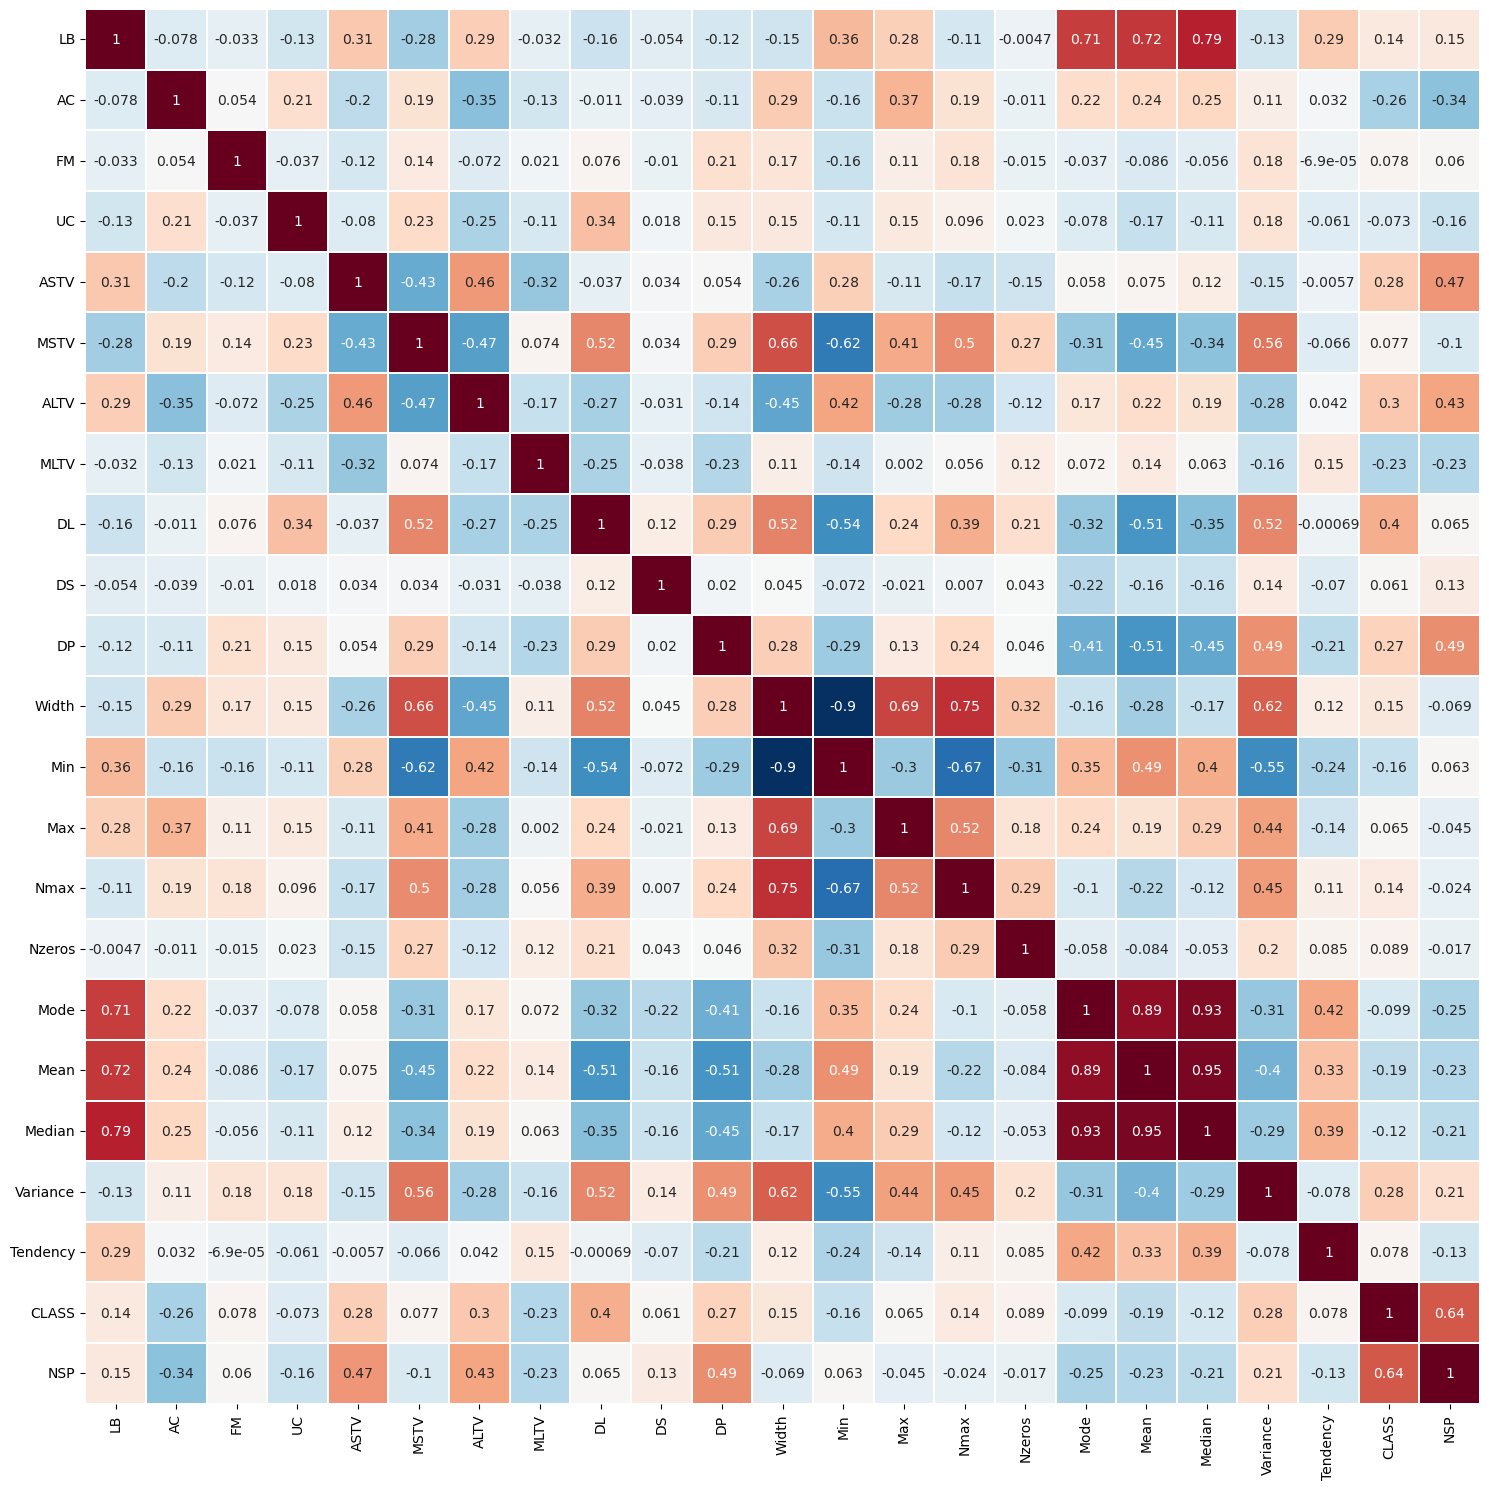

In [17]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df_corr, cmap='RdBu_r', linewidths=0.3, annot=True, cbar=False)
plt.tight_layout()
plt.savefig('Materiale_powerpoint/correlation_matrix_all.png')
plt.show()

**Correlation matrix with measures only for the target variable**

In [18]:
df_corr=df.corr()

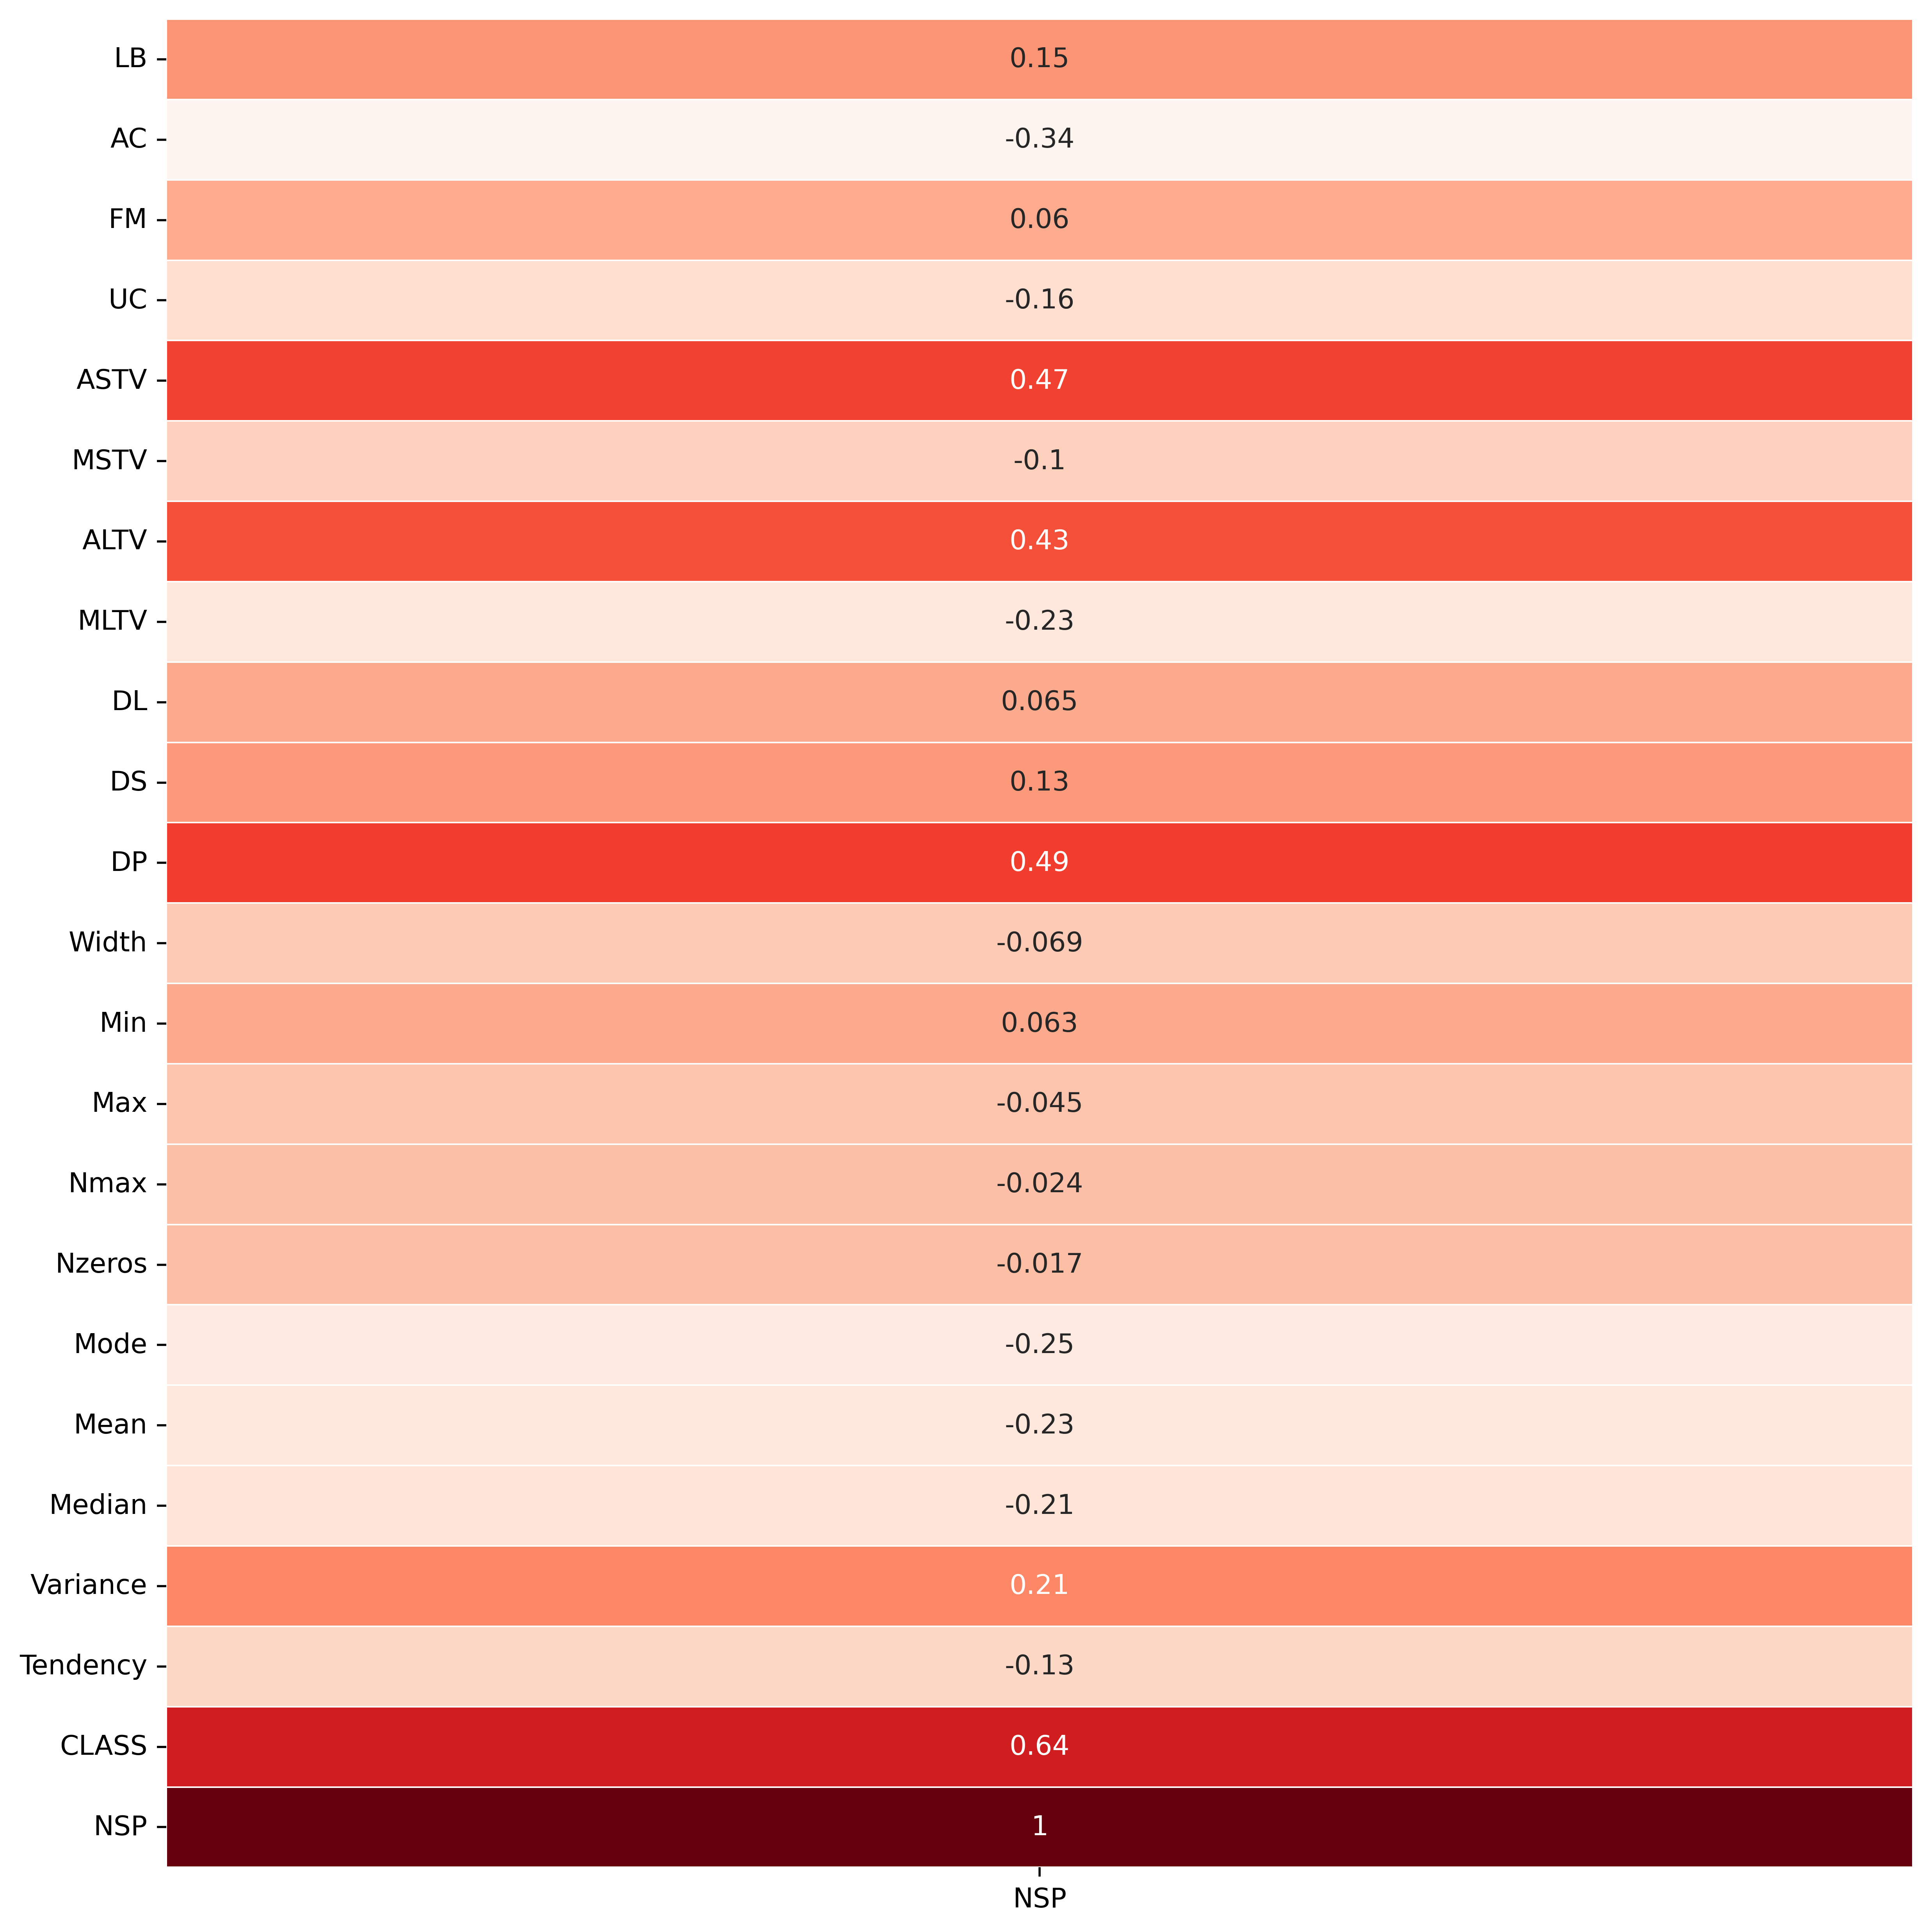

In [19]:
plt.figure(figsize=(10,10),dpi=500)
sns.heatmap(data=df_corr[['NSP']], cmap='Reds', linewidths=0.3, annot=True, cbar=False)
plt.tight_layout()
plt.savefig('Materiale_powerpoint/correlation_matrix_target.png')
plt.show()

**Choosing the least amount of variables to work with with our models thanks to their correlation with the target NSP**

In [20]:
df_corr=abs(df_corr.sort_values(by='NSP'))

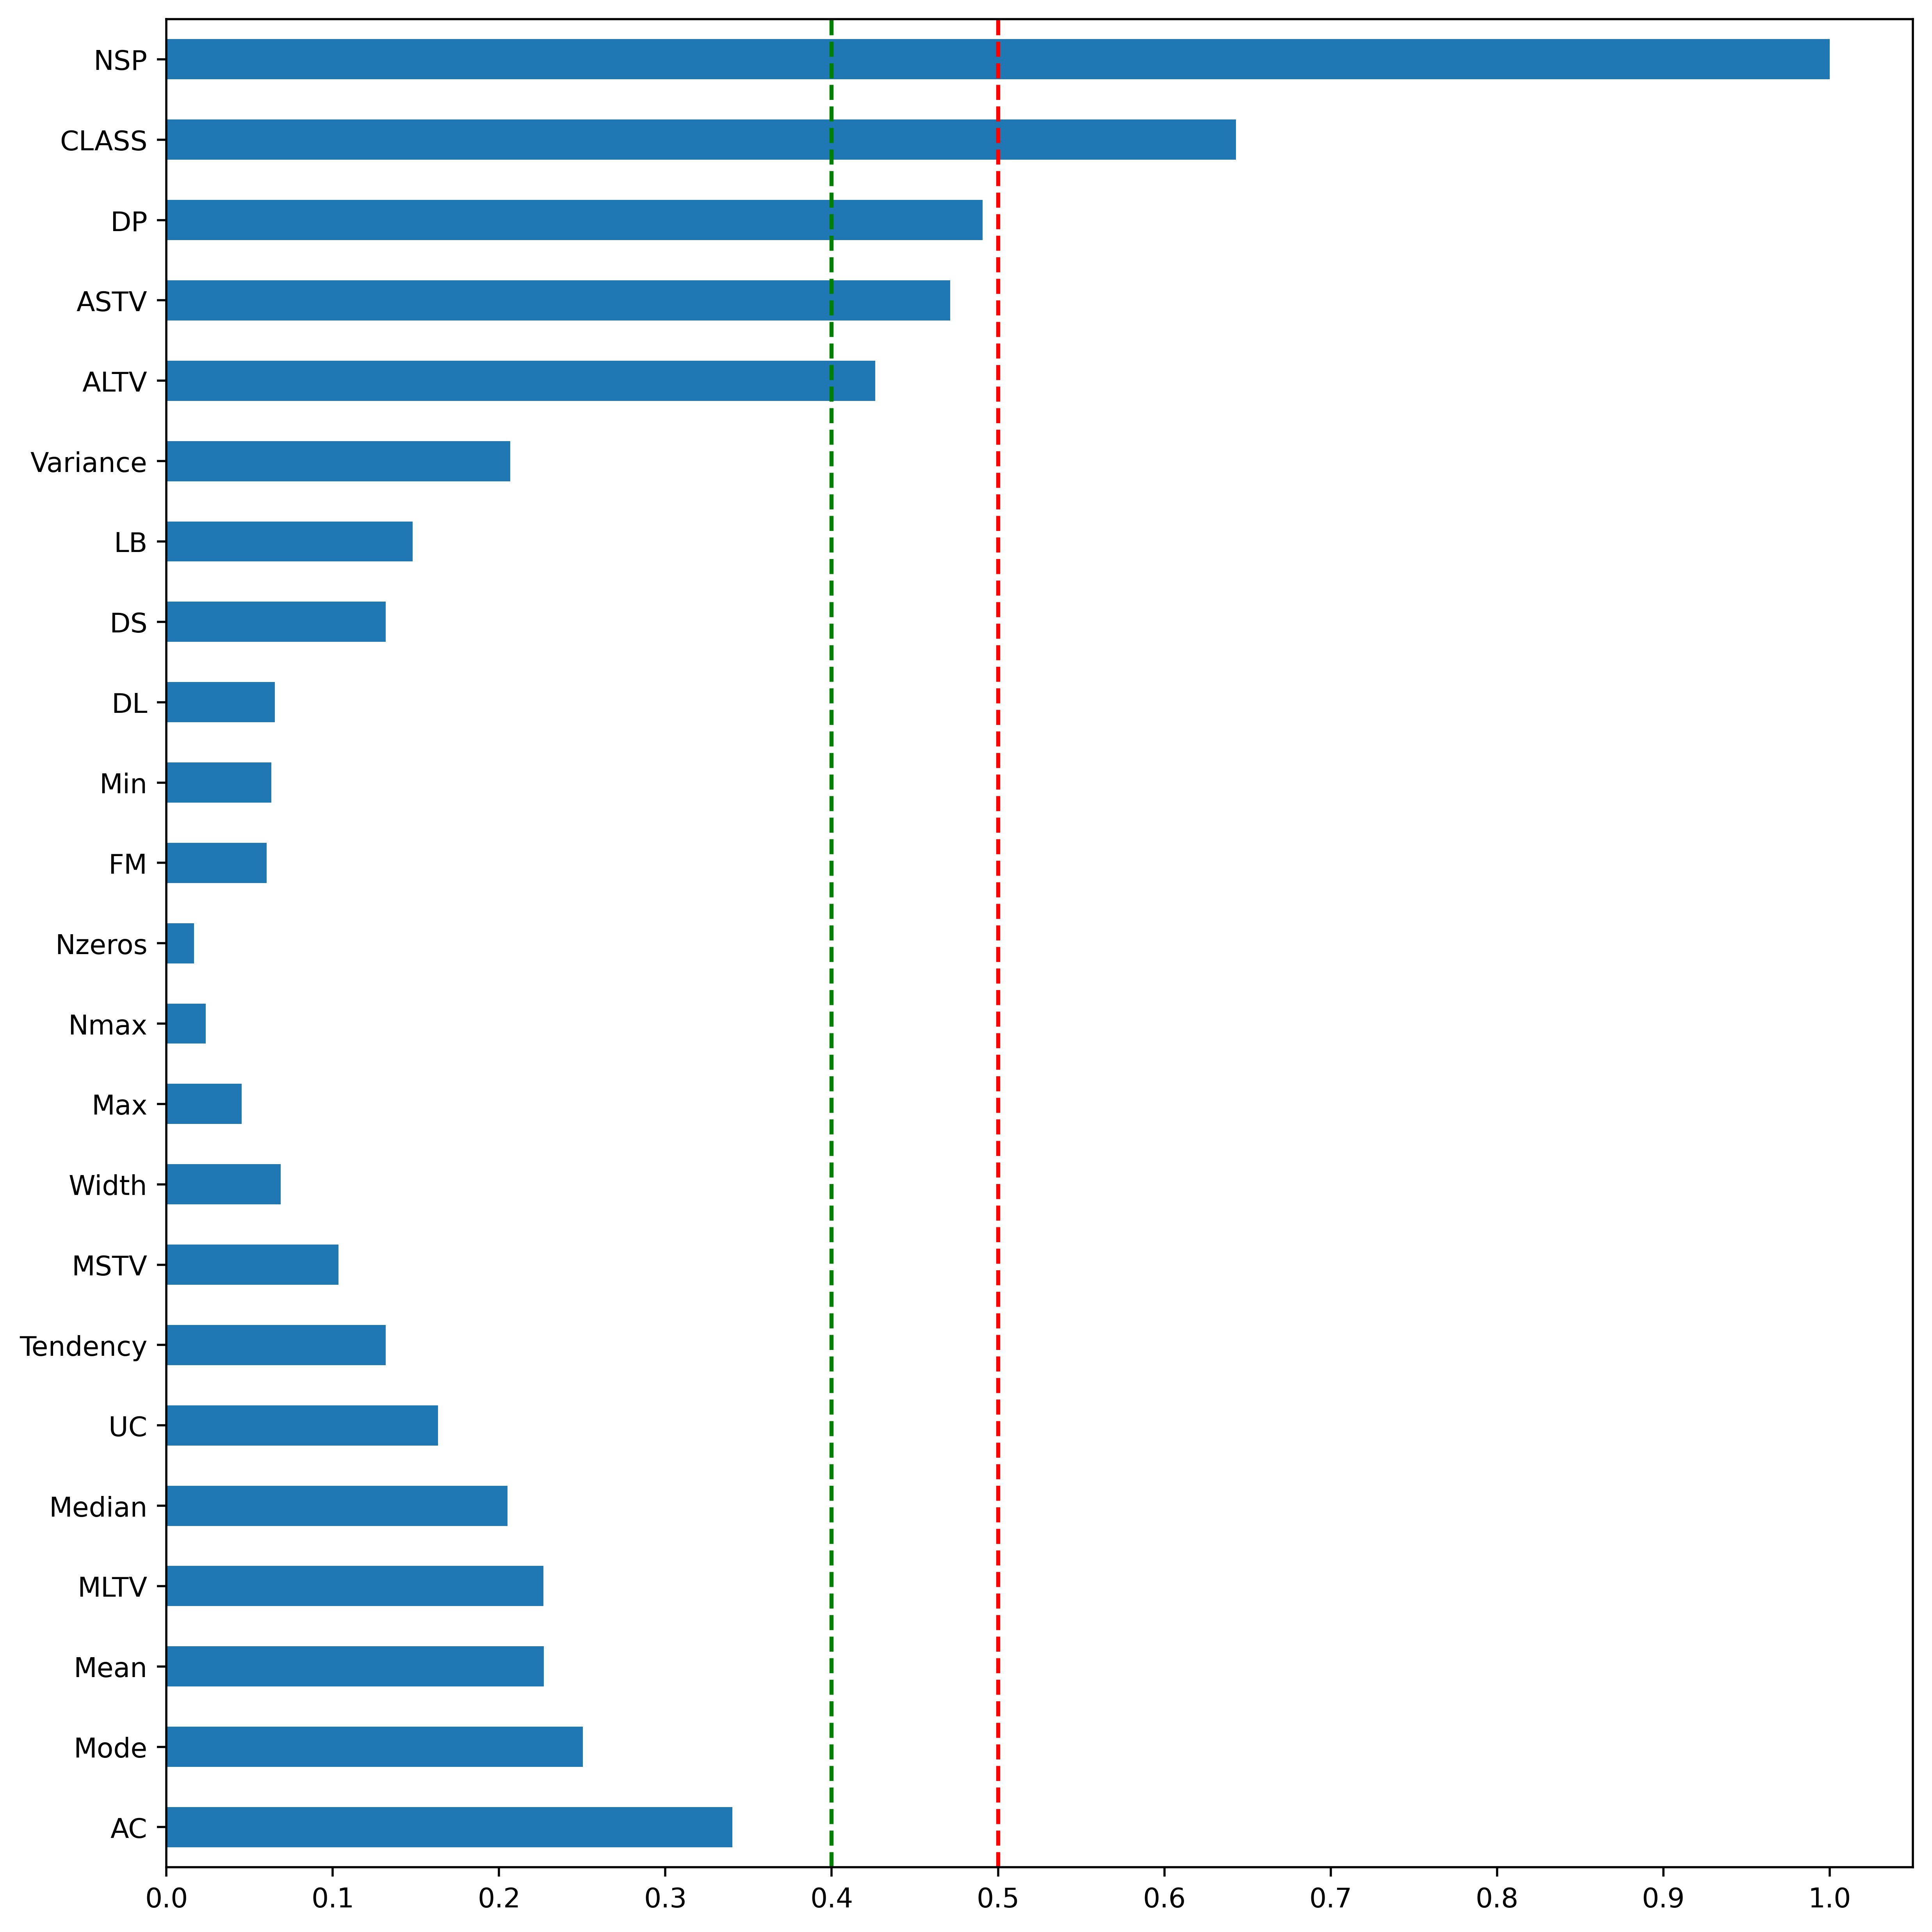

In [21]:
plt.figure(figsize=(10,10), dpi=500)
df_corr['NSP'].plot(kind='barh')
plt.axvline(x= 0.5, ls='--', color='red')
plt.axvline(x= 0.4, ls='--', color='green')
plt.xticks(np.arange(0,1.1,0.1))
plt.tight_layout()
plt.savefig('Materiale_powerpoint/correlation_barplot_all.png')
plt.show()

Given the results above, We will start working with at least **ALTV, ASTV, DP** and the **target NSP**. **Given that they are pretty much all categorical, LB will be added.**

**Analysis of NSP to see if the classes are unbalanced**

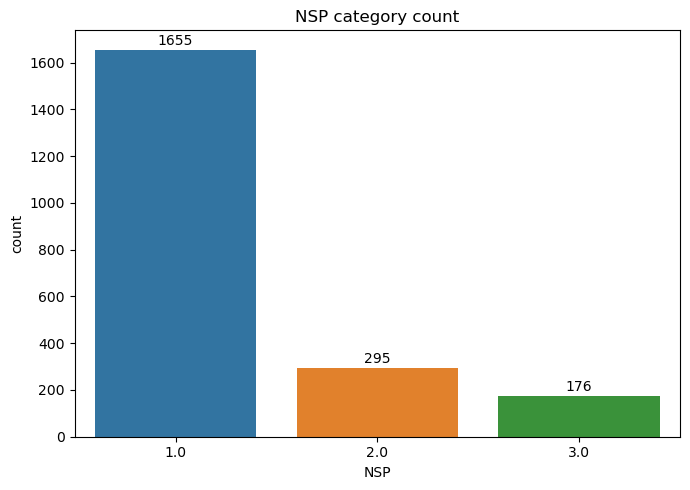

In [22]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(x="NSP", data=df)
ax.bar_label(ax.containers[0], padding=1)
plt.title(label="NSP category count")
plt.tight_layout()
plt.savefig('Materiale_powerpoint/NSP_Category_count.png')
plt.show()

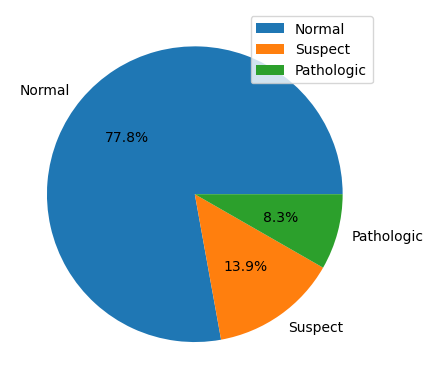

In [23]:
a = df["NSP"].value_counts()
label = ["Normal", "Suspect", "Pathologic"]
plt.pie(a, labels = label, autopct="%1.1f%%")
plt.legend()
plt.savefig('Materiale_powerpoint/NSP_pie_chart.png')
plt.show()

**The classes are very unbalanced, the first one is the most common one**

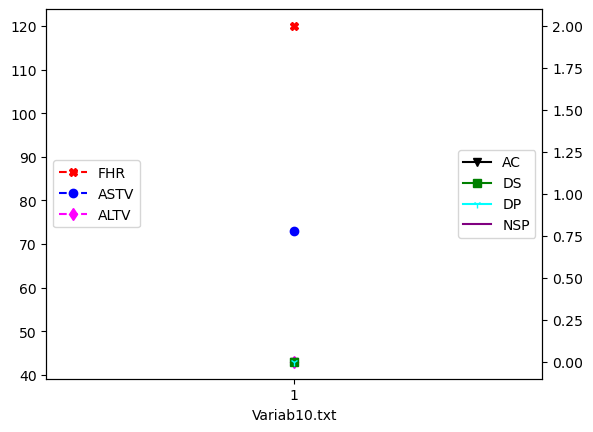

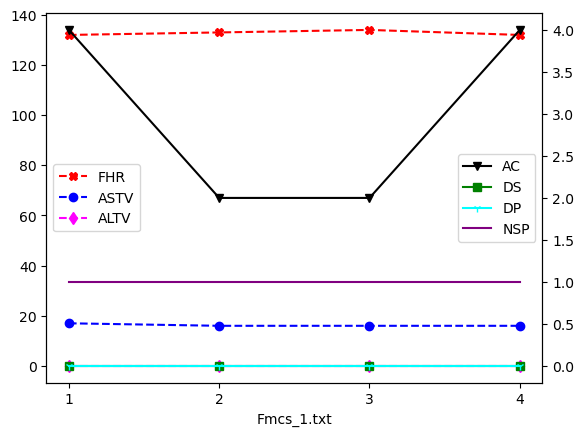

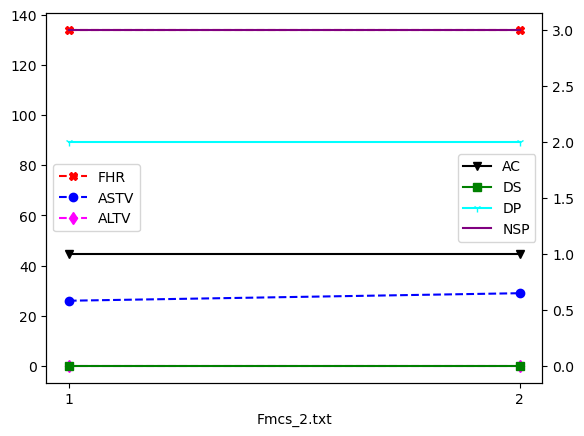

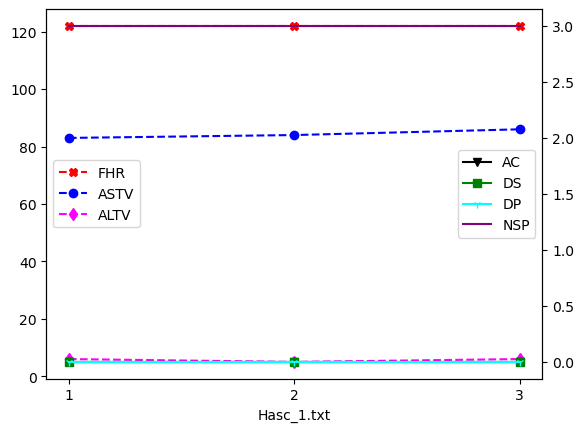

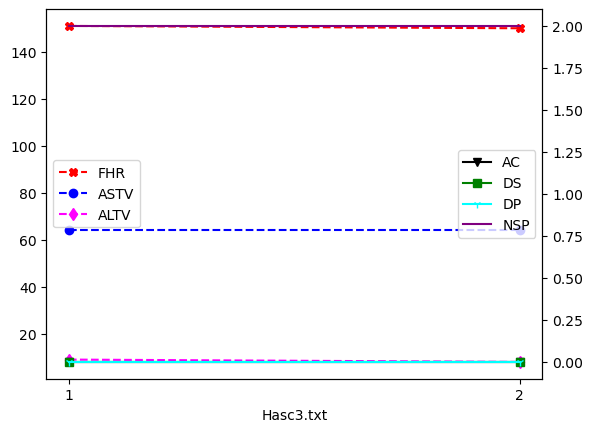

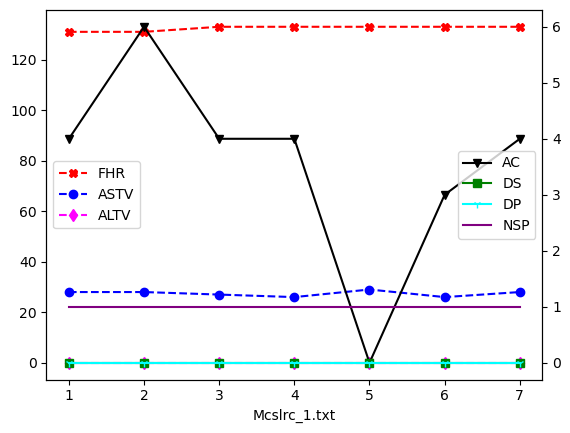

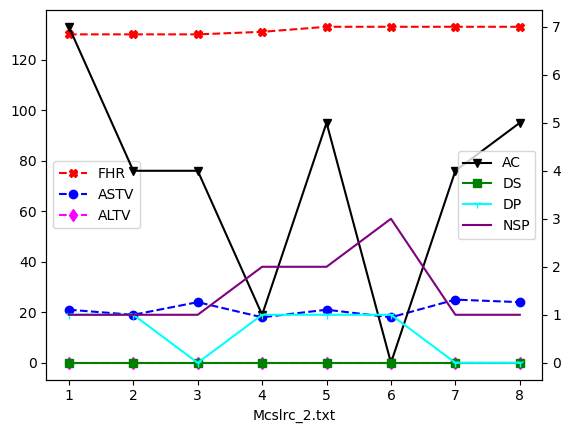

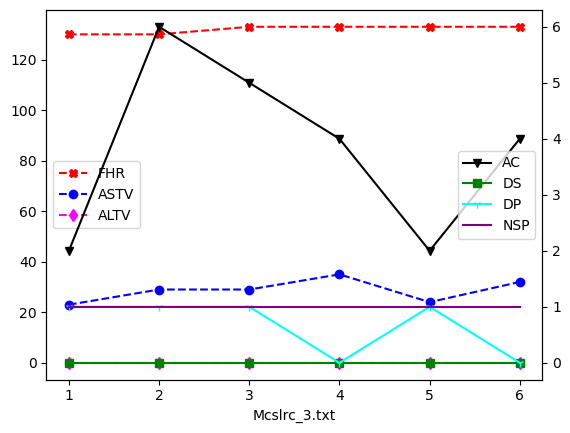

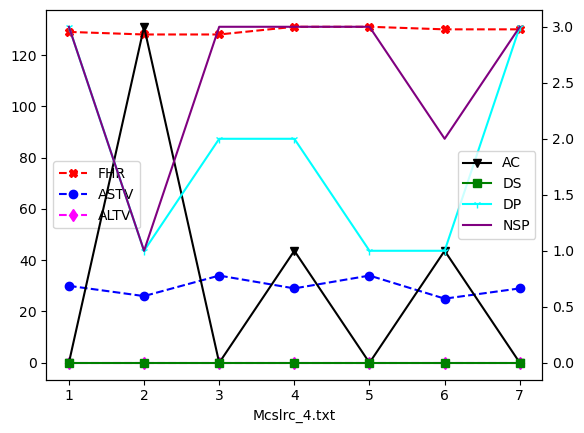

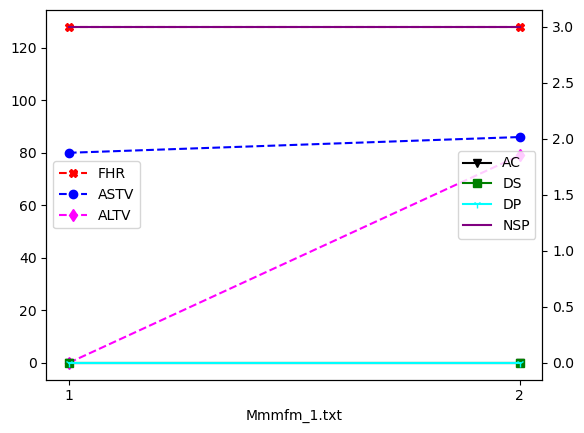

In [24]:
f_name = pd.unique(df["FileName"])

for name in f_name[:10]:#stopping after the first 10, because we would have 100+ charts
    fig, ax = plt.subplots()
    ax.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["LB"], color = "red", marker = "X", linestyle = "--", label = "FHR")
    ax.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["ASTV"], color = "blue", marker = "o", linestyle = "--", label = "ASTV")
    ax.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["ALTV"], color = "magenta", marker = "d", linestyle = "--", label = "ALTV")
    ax2 = ax.twinx()
    ax2.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["AC"], color = "black", marker = "v", label = "AC")
    ax2.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["DS"], color = "green",  marker = "s", label = "DS")
    ax2.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["DP"], color = "cyan", marker = "1", label = "DP")
    ax2.plot(df[df["FileName"] == name]["SegFile"], df[df["FileName"] == name]["NSP"], color = "purple", label = "NSP")
    value = []
    for ind, item in enumerate(df[df["FileName"] == name]["SegFile"]):
        value.append(ind+1)
    ax.set_xticklabels(value)
    ax.set_xlabel(name)
    ax.legend(loc = 'center left')
    ax2.legend(loc = 'center right')
    plt.show()

# Models construction

In the following instructions the models **are going to use the unbalanced classes**. **If the performances are not good, We will upsample.**

In [25]:
columns=['ALTV', 'ASTV', 'DP', 'DS', 'AC', 'NSP', 'LB']

**Given the non-Gaussianity and depedence of our variables of choice, models like LDA and Naive-Bayes cannot work well, so for now models with that kind of assumptions are excluded.**

In [26]:
df_models=df[columns]

Setting constants

In [27]:
RANDOM_STATE=42
K_FOLDS=10
N_JOBS=-1

**Creating the train - test split**

In [28]:
X=df_models.drop(['NSP'], axis=1).values
y= df_models['NSP'].values

In [29]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.2, random_state=RANDOM_STATE, stratify=y)

### Using oversampling to overcome unbalanced classes problems

In [30]:
#Create an oversampled training data
smote = SMOTE(random_state = RANDOM_STATE)
X_oversample_train, y_oversample_train = smote.fit_resample(X_train, y_train)

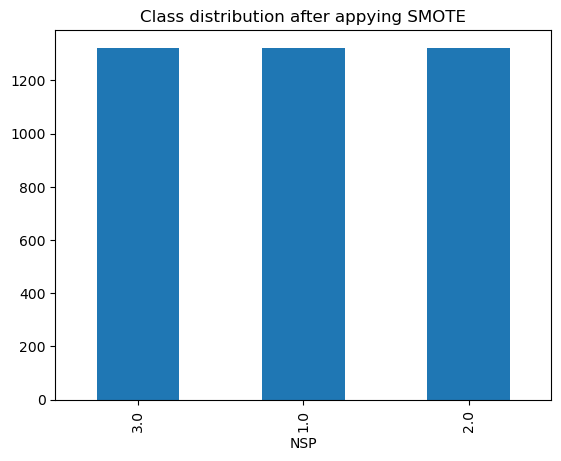

In [31]:
pd.Series(y_oversample_train).value_counts().plot(kind='bar', title='Class distribution after appying SMOTE', xlabel='NSP')
plt.savefig('Materiale_powerpoint/NSP_upsample.png')
plt.show()

In [32]:
X_train, y_train= X_oversample_train, y_oversample_train

**Standardising the variables to have all of them on the same measurement scale**, especially for **LogisticRegression,KNN and SVM**

In [33]:
ss=StandardScaler()
X_train_std=ss.fit_transform(X_train)
X_test_std=ss.transform(X_test)

Creating the **stratified kfold** to use on the models. **Using a stratified sampling method helps with unbalaced classes.**

In [34]:
skfold=StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=RANDOM_STATE)
#shuffle is true given the non sequentiality of the data

## Logistic Regression

In [35]:
lr=LogisticRegression(class_weight="balanced", n_jobs=N_JOBS)

parameters = {'C': stats.loguniform(1e0, 1e1), 'max_iter': [500, 1000], "class_weight":[None,"balanced"]}

rs=RandomizedSearchCV(estimator=lr, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE, scoring="accuracy")

rs.fit(X_train_std,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LogisticRegression(class_weight='balanced',
                                                n_jobs=-1),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7fef3e65b0a0>,
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [500, 1000]},
                   random_state=42, scoring='accuracy')

**Getting the best etimator in cv**

In [36]:
best_estimator_lr= rs.best_estimator_
best_estimator_lr

LogisticRegression(C=1.1430983876313219, class_weight='balanced', max_iter=500,
                   n_jobs=-1)

In [37]:
best_params_lr= rs.best_params_
best_params_lr

{'C': 1.1430983876313219, 'class_weight': 'balanced', 'max_iter': 500}

In [38]:
rs.best_score_

0.8445500343485228

**Doing the predictions with the best model**

In [39]:
lr = LogisticRegression(**best_params_lr, random_state=RANDOM_STATE, n_jobs=N_JOBS)
lr.fit(X=X_train_std, y=y_train)

LogisticRegression(C=1.1430983876313219, class_weight='balanced', max_iter=500,
                   n_jobs=-1, random_state=42)

In [40]:
y_pred = lr.predict(X=X_test_std)

**Printing the model performances**

In [41]:
target_names=['Normal','Suspect','Pathologic']

In [42]:
lr_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(lr_performances)

              precision    recall  f1-score   support

      Normal       0.96      0.83      0.89       332
     Suspect       0.45      0.78      0.57        59
  Pathologic       0.67      0.69      0.68        35

    accuracy                           0.81       426
   macro avg       0.69      0.77      0.71       426
weighted avg       0.87      0.81      0.83       426



As We can see, the model has an **81% accuracy with recall that changes a bit for each class**, which is the target of the analysis.

**Computing and printing the confusion matrix**

In [43]:
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[277,  48,   7],
       [  8,  46,   5],
       [  3,   8,  24]])

<Figure size 1000x1000 with 0 Axes>

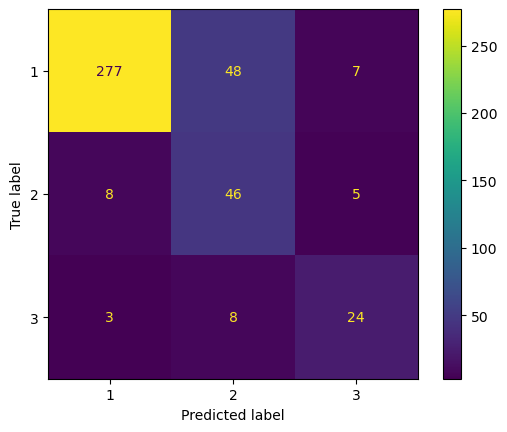

In [44]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=lr,X=X_test_std, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_logistic_reg.png')
plt.show()

## KNN Classifier

In [45]:
knn=KNeighborsClassifier(n_jobs=N_JOBS)

parameters = {"n_neighbors": range(1,len(X)+1)}

rs=RandomizedSearchCV(estimator=knn, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE,scoring="accuracy")

rs.fit(X_train_std,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=KNeighborsClassifier(n_jobs=-1),
                   param_distributions={'n_neighbors': range(1, 2127)},
                   random_state=42, scoring='accuracy')

**Getting the best etimator in cv**

In [46]:
best_estimator_knn=rs.best_estimator_
best_estimator_knn

KNeighborsClassifier(n_jobs=-1, n_neighbors=131)

In [47]:
best_params_knn= rs.best_params_
best_params_knn

{'n_neighbors': 131}

In [48]:
rs.best_score_

0.8790620308882275

**Doing the predictions with the best model**

In [49]:
knn=KNeighborsClassifier(**best_params_knn, n_jobs=N_JOBS)

In [50]:
knn.fit(X=X_train_std, y=y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=131)

In [51]:
y_pred=knn.predict(X=X_test_std)

**Printing the model performances**

In [52]:
knn_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(knn_performances)

              precision    recall  f1-score   support

      Normal       0.97      0.80      0.88       332
     Suspect       0.44      0.83      0.57        59
  Pathologic       0.74      0.80      0.77        35

    accuracy                           0.81       426
   macro avg       0.71      0.81      0.74       426
weighted avg       0.88      0.81      0.83       426



As We can see,  **the KNN has 81% accuracy and a slighty higher and more stable recall in all classes**. **The performances for these metrics are better than the Logistic Regression's ones.**

**Computing and printing the confusion matrix**

In [53]:
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

[[267  59   6]
 [  6  49   4]
 [  3   4  28]]


<Figure size 1000x1000 with 0 Axes>

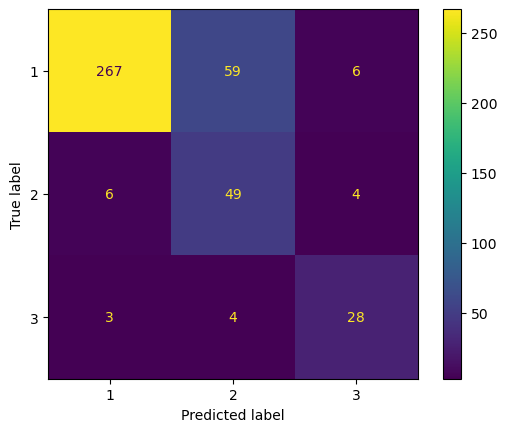

In [54]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=knn,X=X_test_std, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_knn.png')
plt.show()

## Decision Tree Classifier

In [55]:
dtc=DecisionTreeClassifier(class_weight="balanced", random_state=RANDOM_STATE)

parameters = {'criterion':['gini','entropy'], 'max_depth': range(1,100,2), "max_features": range(1,len(columns)+1,1), 
              'class_weight':[None,'balanced']}

rs=RandomizedSearchCV(estimator=dtc, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE, scoring="accuracy")

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    random_state=42),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 100, 2),
                                        'max_features': range(1, 8)},
                   random_state=42, scoring='accuracy')

**Getting the best etimator in cv**

In [56]:
best_estimator_dtc=rs.best_estimator_
best_estimator_dtc

DecisionTreeClassifier(class_weight='balanced', max_depth=99, max_features=2,
                       random_state=42)

In [57]:
best_params_dtc=rs.best_params_
best_params_dtc

{'max_features': 2,
 'max_depth': 99,
 'criterion': 'gini',
 'class_weight': 'balanced'}

In [58]:
rs.best_score_#better than LogisticRegression and KNN

0.9581762206447346

**Predicting using the best model**

In [59]:
dtc=DecisionTreeClassifier(**best_params_dtc, random_state=RANDOM_STATE)
dtc.fit(X=X_train, y=y_train)#using not standardised data given that trees are not touched by the scaleand magnitude of data

DecisionTreeClassifier(class_weight='balanced', max_depth=99, max_features=2,
                       random_state=42)

In [60]:
y_pred=dtc.predict(X=X_test)

**Plotting the feature importances plot**

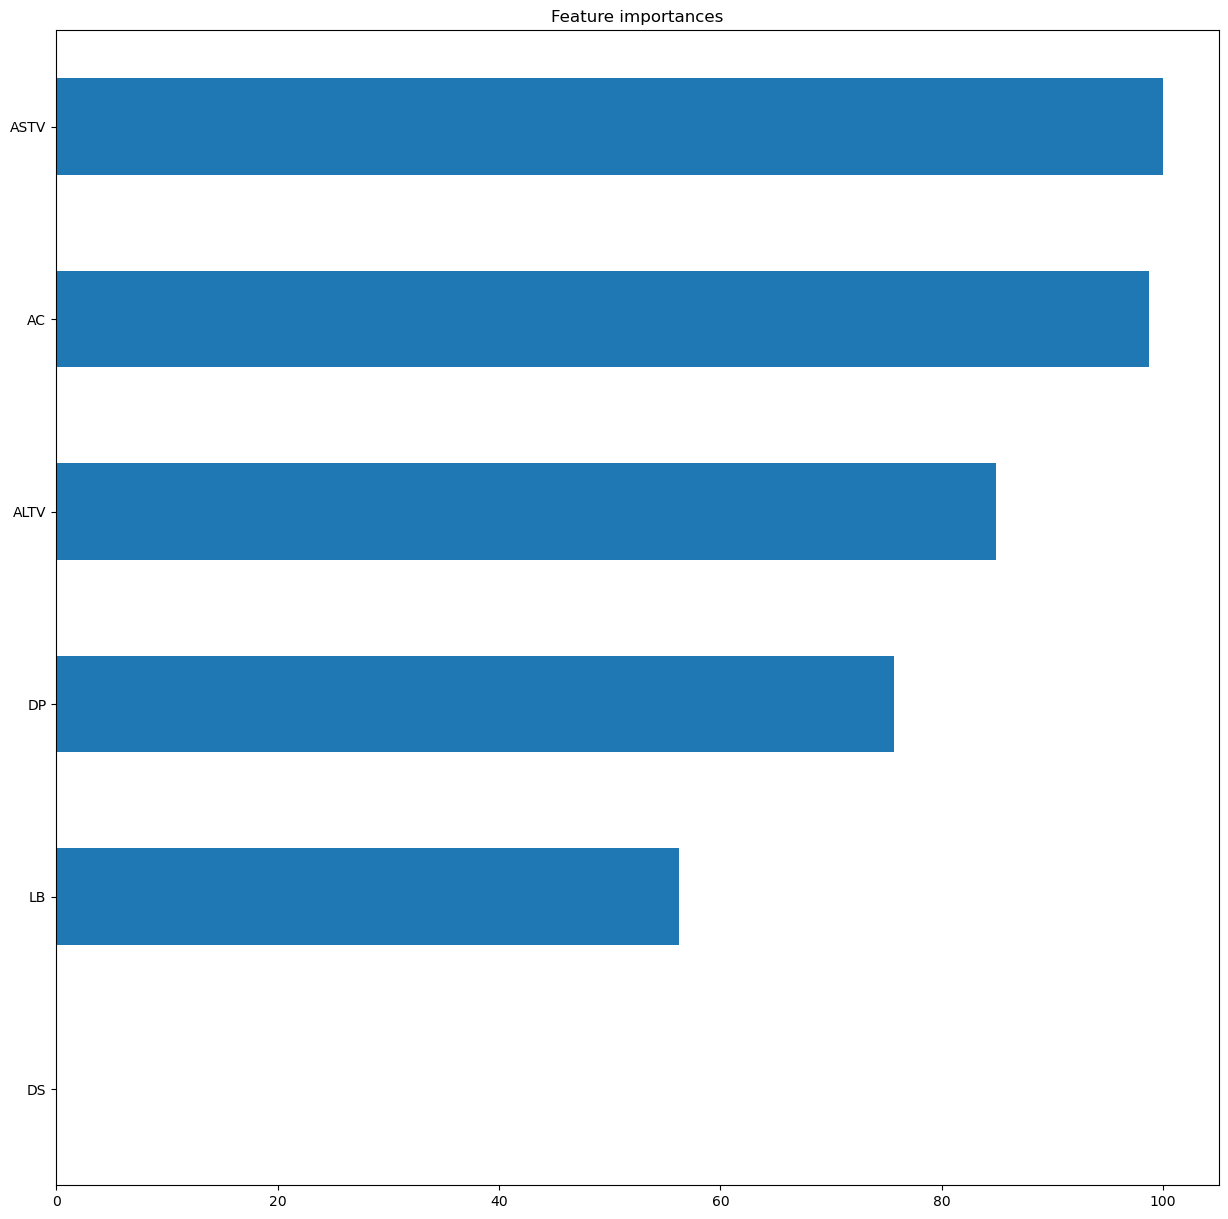

In [61]:
feature_importances = dtc.feature_importances_
feature_importances = 100 * (feature_importances/feature_importances.max())
series = pd.Series(data=feature_importances, index=df_models.drop(columns=['NSP']).columns).sort_values()
series.plot(kind="barh", figsize=(15, 15), title=f"Feature importances", legend=None)
plt.savefig('Materiale_powerpoint/feature_importance_plot_dtc.png')
plt.show()

**Plotting the tree**

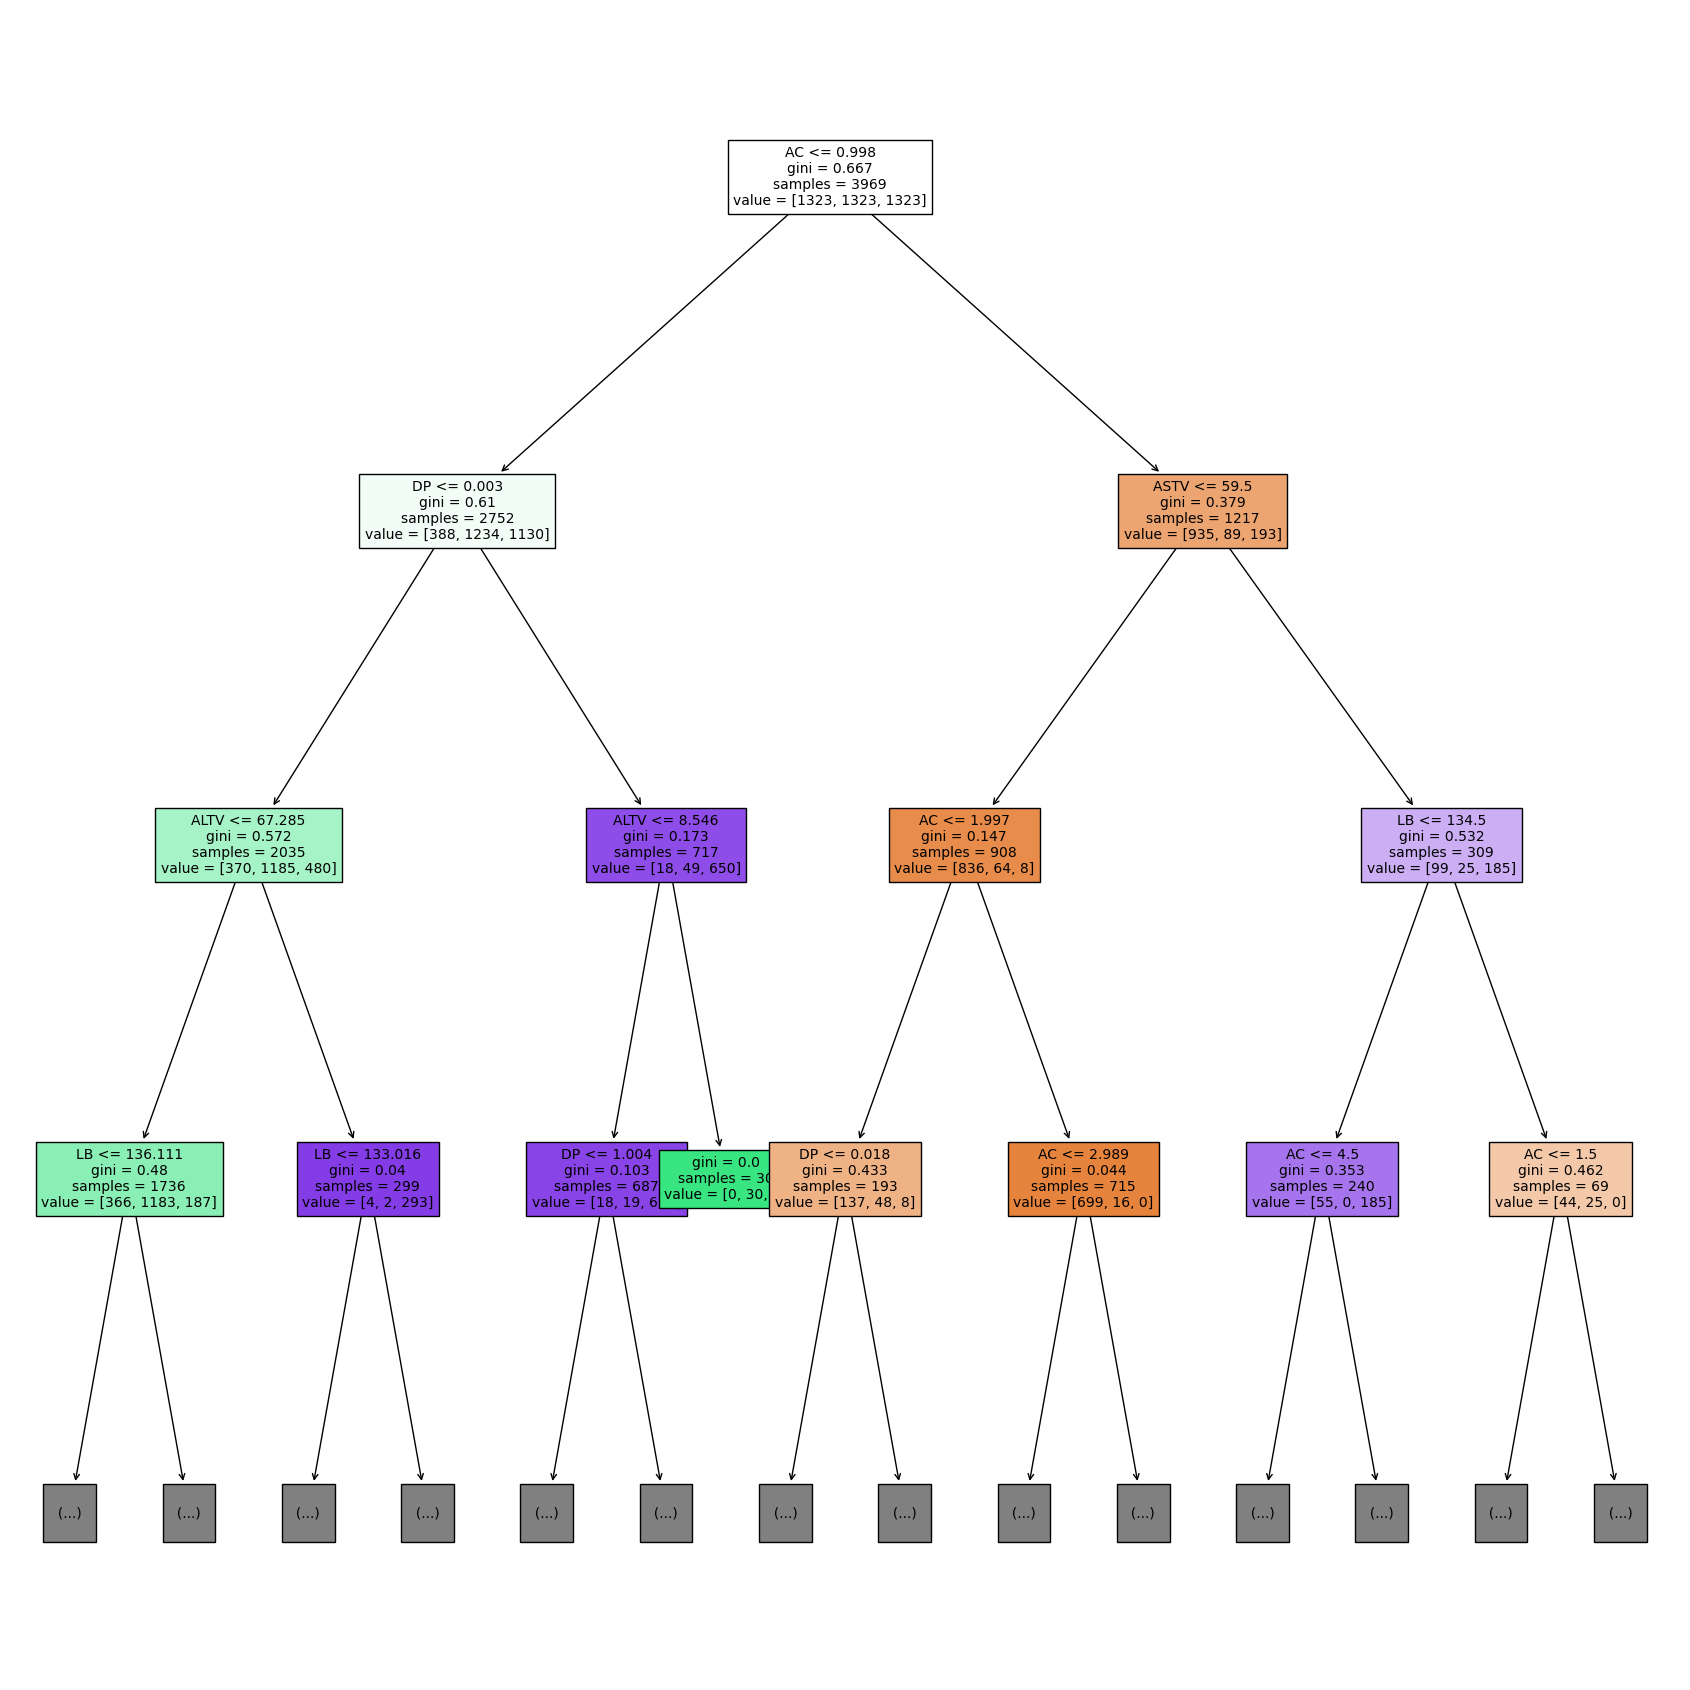

In [62]:
plt.figure(figsize=(17,17))
plot_tree(decision_tree=dtc, max_depth=3, filled=True, feature_names=df_models.drop(columns=['NSP']).columns,fontsize=10)
plt.tight_layout()
plt.savefig('Materiale_powerpoint/tree.png')
plt.show()

As We can see, **LD is the variable that splits better by  entropy**

**Printing the model performances**

In [63]:
dtc_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(dtc_performances)

              precision    recall  f1-score   support

      Normal       0.95      0.95      0.95       332
     Suspect       0.75      0.71      0.73        59
  Pathologic       0.89      0.89      0.89        35

    accuracy                           0.92       426
   macro avg       0.86      0.85      0.86       426
weighted avg       0.91      0.92      0.91       426



**The Decision Tree has an overall higher accuracy of 92%, more than the KNN and LogisticRegression, but the recall for Suspect class is worse than the one of KNN**.

**Computing and printing the confusion matrix**

In [64]:
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

[[317  13   2]
 [ 15  42   2]
 [  3   1  31]]


<Figure size 1000x1000 with 0 Axes>

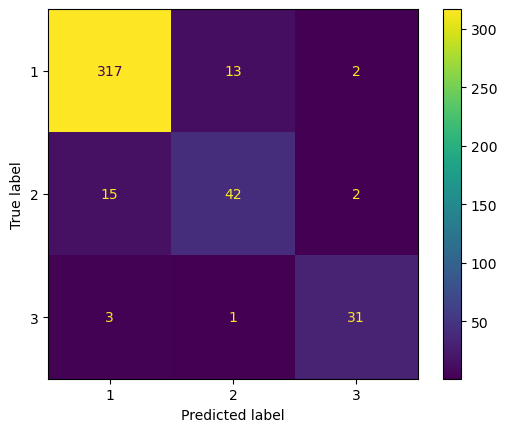

In [65]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=dtc,X=X_test, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_decision_tree.png')
plt.show()

## RandomForest Classifier

In [66]:
rfc=RandomForestClassifier(class_weight="balanced", random_state=RANDOM_STATE,n_jobs=N_JOBS)

parameters = {'n_estimators':range(0,151,1), 'criterion':['gini','entropy'], 'max_depth': range(1,100,2), 
              "max_features": range(1,len(columns)+1,1), 'class_weight':[None,'balanced']}

rs=RandomizedSearchCV(estimator=rfc, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE,scoring="accuracy")

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    n_jobs=-1,
                                                    random_state=42),
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': range(1, 100, 2),
                                        'max_features': range(1, 8),
                                        'n_estimators': range(0, 151)},
                   random_state=42, scoring='accuracy')

**Getting the best etimator in cv**

In [67]:
best_estimator_rfc=rs.best_estimator_
best_estimator_rfc

RandomForestClassifier(criterion='entropy', max_depth=97, max_features=1,
                       n_estimators=108, n_jobs=-1, random_state=42)

In [68]:
best_params_rfc=rs.best_params_
best_params_rfc

{'n_estimators': 108,
 'max_features': 1,
 'max_depth': 97,
 'criterion': 'entropy',
 'class_weight': None}

In [69]:
rs.best_score_#better than LogisticRegression, KNN and DecisionTree

0.9705219703330533

**Predicting using the best model**

In [70]:
rfc=RandomForestClassifier(**best_params_rfc, random_state=RANDOM_STATE, n_jobs=N_JOBS)
rfc.fit(X=X_train,y=y_train)#using not standardised data given that trees are not touched by the scaleand magnitude of data

RandomForestClassifier(criterion='entropy', max_depth=97, max_features=1,
                       n_estimators=108, n_jobs=-1, random_state=42)

In [71]:
y_pred=rfc.predict(X=X_test)

**Printing the model performances**

In [72]:
rfc_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(rfc_performances)

              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96       332
     Suspect       0.78      0.73      0.75        59
  Pathologic       0.89      0.91      0.90        35

    accuracy                           0.93       426
   macro avg       0.88      0.87      0.87       426
weighted avg       0.93      0.93      0.93       426



As We can see,  **the Random Forest has even higher accuracy, a 93% with even higher recalls for Normal and Pathologic classes, but the second class still has some problems**. **The performances are better than the Logistic Regression, KNN and Decision Tree ones, and has a pretty high precision too, which is pretty interesting.** For now, it is **the best candidate** to solve the classification problem.

**Computing and printing the confusion matrix**

In [73]:
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

[[320  10   2]
 [ 14  43   2]
 [  1   2  32]]


<Figure size 1000x1000 with 0 Axes>

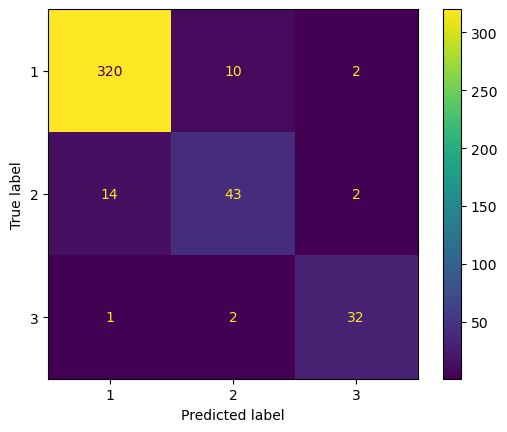

In [74]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=rfc,X=X_test, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_random_forest.png')
plt.show()

In [75]:
y_test_probs = rfc.predict_proba(X=X_test)

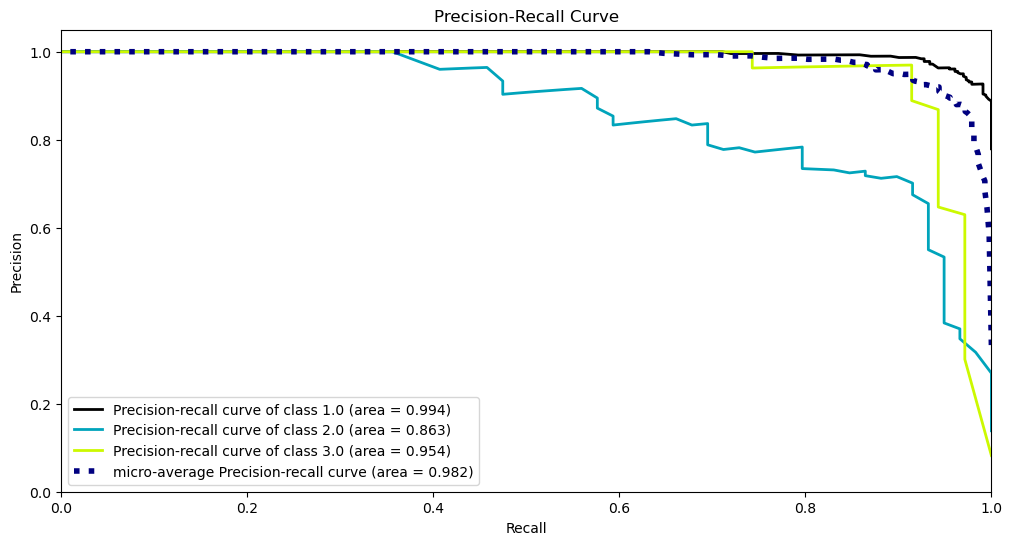

In [76]:
skplt.metrics.plot_precision_recall_curve(y_test, y_test_probs,
                       title="Precision-Recall Curve", figsize=(12,6))
plt.savefig('Materiale_powerpoint/Precision_recall_curve_random_forest.png')

## AdaBoostClassifier

In [77]:
abc=AdaBoostClassifier(random_state=RANDOM_STATE)

parameters={'n_estimators':range(0,101,1), 'learning_rate':range(0,11,1),'algorithm':['SAMME','SAMME.R']}

rs=RandomizedSearchCV(estimator=abc, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE, scoring='accuracy')

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=42),
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': range(0, 11),
                                        'n_estimators': range(0, 101)},
                   random_state=42, scoring='accuracy')

**Getting the best etimator in cv**

In [78]:
best_params_abc=rs.best_params_
best_params_abc

{'n_estimators': 82, 'learning_rate': 1, 'algorithm': 'SAMME.R'}

In [79]:
best_estimator_abc=rs.best_estimator_
best_estimator_abc

AdaBoostClassifier(learning_rate=1, n_estimators=82, random_state=42)

In [80]:
rs.best_score_#worse

0.8742761366816783

**Predicting using the best model**

In [81]:
abc=AdaBoostClassifier(**best_params_abc, random_state=RANDOM_STATE)
abc.fit(X=X_train, y=y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=82, random_state=42)

In [82]:
y_pred=abc.predict(X=X_test)

**Printing the model performances**

In [83]:
abc_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(abc_performances)

              precision    recall  f1-score   support

      Normal       0.95      0.81      0.87       332
     Suspect       0.45      0.85      0.59        59
  Pathologic       0.87      0.77      0.82        35

    accuracy                           0.81       426
   macro avg       0.76      0.81      0.76       426
weighted avg       0.87      0.81      0.83       426



As We can see,  **the Ada Boost has similar performances to the KNN, with an equal accuracy of 81% and similar recalls**.

**Computing and printing the confusion matrix**

In [84]:
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

[[269  60   3]
 [  8  50   1]
 [  7   1  27]]


<Figure size 1000x1000 with 0 Axes>

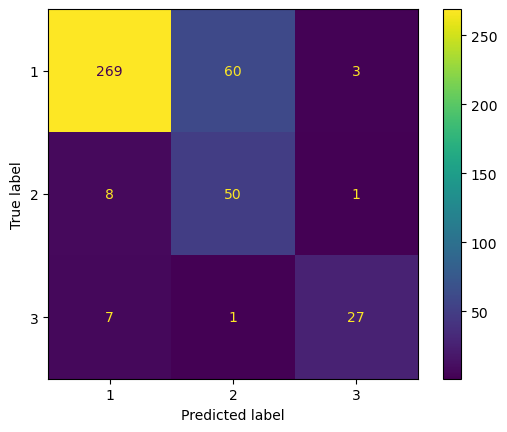

In [85]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=abc,X=X_test, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_ada_boost.png')
plt.show()

## Support Vectors

In [86]:
sv=SVC(random_state=RANDOM_STATE, class_weight='balanced',decision_function_shape='ovo')

parameters={'C':range(0,10,1), 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
            'degree':range(0,11,1), 'gamma':['scale', 'auto'], 'class_weight':[None,'balanced']}

rs=RandomizedSearchCV(estimator=sv, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE, scoring='accuracy')

rs.fit(X_train_std,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=SVC(class_weight='balanced',
                                 decision_function_shape='ovo',
                                 random_state=42),
                   param_distributions={'C': range(0, 10),
                                        'class_weight': [None, 'balanced'],
                                        'degree': range(0, 11),
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy')

**Getting the best estimator in cv**

In [87]:
best_params_sv= rs.best_params_
best_params_sv

{'kernel': 'rbf', 'gamma': 'auto', 'degree': 6, 'class_weight': None, 'C': 9}

In [88]:
best_estimator_sv=rs.best_estimator_
best_estimator_sv

SVC(C=9, decision_function_shape='ovo', degree=6, gamma='auto', random_state=42)

In [89]:
rs.best_score_

0.926681805460143

**Predicting using the best model**

In [90]:
sv=SVC(**best_params_sv, random_state=RANDOM_STATE)
sv.fit(X=X_train_std,y=y_train)

SVC(C=9, degree=6, gamma='auto', random_state=42)

In [91]:
y_pred=sv.predict(X=X_test_std)

**Printing the model performances**

In [92]:
sv_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(sv_performances)

              precision    recall  f1-score   support

      Normal       0.95      0.89      0.92       332
     Suspect       0.57      0.78      0.66        59
  Pathologic       0.83      0.83      0.83        35

    accuracy                           0.87       426
   macro avg       0.78      0.83      0.80       426
weighted avg       0.89      0.87      0.87       426



**The SVM does is the second best in terms of accuracy, with an 87%, behind the RandomForest, and the recall scores are worse only than the ones of the RandomForest classifier**.

**Computing and printing the confusion matrix**

In [93]:
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

[[294  34   4]
 [ 11  46   2]
 [  5   1  29]]


<Figure size 1000x1000 with 0 Axes>

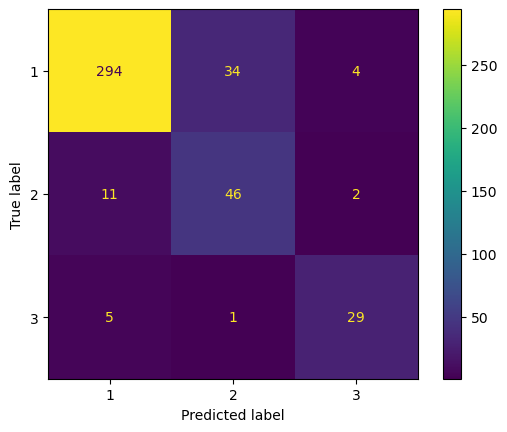

In [94]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=sv,X=X_test_std, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_svm.png')
plt.show()

## Bagged Tree

In [95]:
clf=BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_jobs=N_JOBS, random_state=RANDOM_STATE)

parameters={'n_estimators':range(1,21,1), 'max_samples':range(1,11,1), 'max_features':range(1,11,1) }

rs=RandomizedSearchCV(estimator=clf, param_distributions=parameters, cv=skfold, random_state=RANDOM_STATE, scoring='accuracy')

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                               n_jobs=-1, random_state=42),
                   param_distributions={'max_features': range(1, 11),
                                        'max_samples': range(1, 11),
                                        'n_estimators': range(1, 21)},
                   random_state=42, scoring='accuracy')

**Getting the best estimator in cv**

In [96]:
best_params_bag=rs.best_params_
best_params_bag

{'n_estimators': 11, 'max_samples': 7, 'max_features': 6}

In [97]:
best_estimator_bag=rs.best_estimator_
best_estimator_bag

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=6,
                  max_samples=7, n_estimators=11, n_jobs=-1, random_state=42)

In [98]:
rs.best_score_

0.7190488003460296

**Predicting using the best model**

In [99]:
clf=BaggingClassifier(**best_params_bag,base_estimator=DecisionTreeClassifier(),n_jobs=N_JOBS, random_state=RANDOM_STATE)
clf.fit(X=X_train,y=y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=6,
                  max_samples=7, n_estimators=11, n_jobs=-1, random_state=42)

In [100]:
y_pred=clf.predict(X=X_test)

**Printing the model performances**

In [101]:
bag_performances=classification_report(y_true=y_test, y_pred=y_pred, target_names=target_names)
print(bag_performances)

              precision    recall  f1-score   support

      Normal       0.96      0.65      0.77       332
     Suspect       0.32      0.76      0.45        59
  Pathologic       0.29      0.51      0.37        35

    accuracy                           0.65       426
   macro avg       0.52      0.64      0.53       426
weighted avg       0.82      0.65      0.70       426



The **bagged trees are the worse perfoming ones, with the lowest scores seen in the model section so far.**

**Computing and printing the confusion matrix**

In [102]:
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

[[215  78  39]
 [  8  45   6]
 [  1  16  18]]


<Figure size 1000x1000 with 0 Axes>

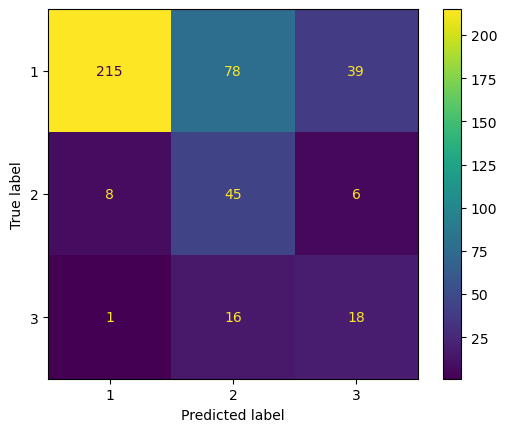

In [103]:
labels=[1,2,3]
plt.figure(figsize=(10,10))
ConfusionMatrixDisplay.from_estimator(estimator=clf,X=X_test, y=y_test, labels=labels)
plt.savefig('Materiale_powerpoint/Confusion_matrix_bagged_trees.png')
plt.show()

**Plotting the models by their accuracy development in cross-validation**

Listing all the models

In [104]:
models = []
models.append(('LR', lr))
models.append(('KNN', knn))
models.append(('DTC', dtc))
models.append(('RFC', rfc))
models.append(('ABC', abc))
models.append(('SVM', sv))
models.append(('BAG', clf))
    

Getting the accuracy scores

In [105]:
#not standardising the variables is not a big problem given that they are pretty much on the same scale, 
#so the plot underneath is pretty accurate
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    skfold = StratifiedKFold(n_splits=K_FOLDS, random_state=RANDOM_STATE, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=skfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.834721 (0.023377)
KNN: 0.840015 (0.016371)
DTC: 0.958176 (0.010149)
RFC: 0.970522 (0.005857)
ABC: 0.874276 (0.020629)
SVM: 0.961704 (0.011195)
BAG: 0.719049 (0.037874)


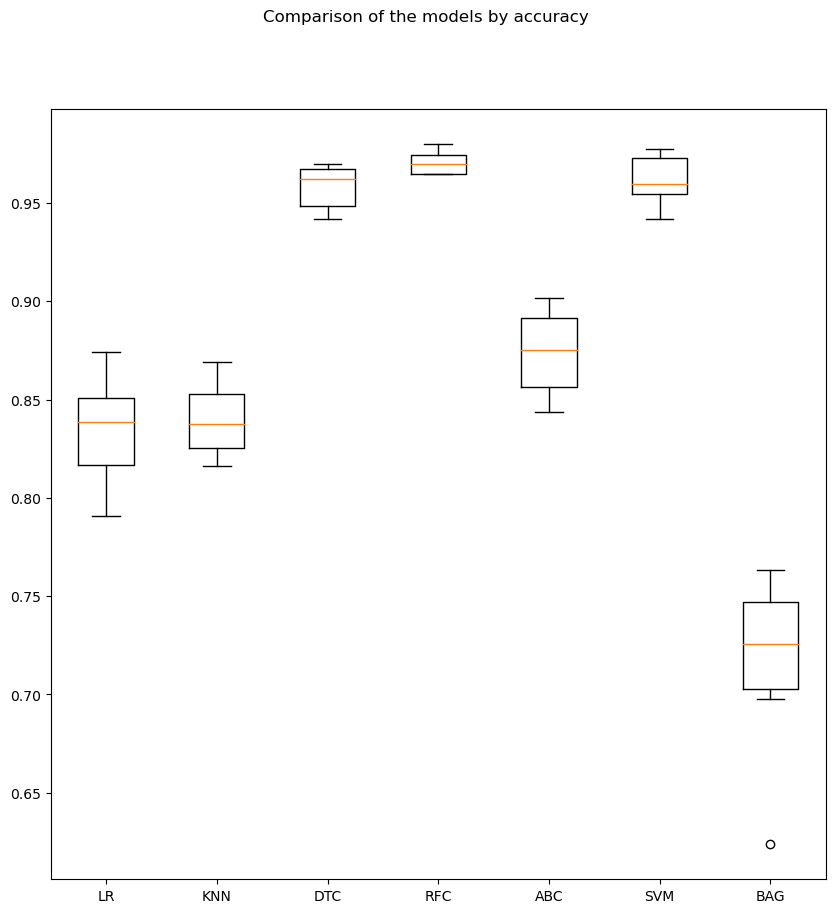

In [106]:
fig = plt.figure(figsize=(10,10))
fig.suptitle('Comparison of the models by accuracy')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('Materiale_powerpoint/model_comparison_by_accuracy.png')
plt.show()

## Saving the best model, the Random Forest

Given the results above , comparing the various metrics, the best performing overall was the RandomForest, followed by the SVM

In [107]:
rfc=RandomForestClassifier(**best_params_rfc, random_state=RANDOM_STATE, n_jobs=N_JOBS)

pipe_model = Pipeline(
    steps=[
        ("Model", rfc)
    ]
)
pipe_model.fit(X=X_train, y=y_train)

Pipeline(steps=[('Model',
                 RandomForestClassifier(criterion='entropy', max_depth=97,
                                        max_features=1, n_estimators=108,
                                        n_jobs=-1, random_state=42))])

In [108]:
joblib.dump(value=pipe_model, filename="data_challenge_FHR_best_model.joblib")

['data_challenge_FHR_best_model.joblib']